## Dependency Parsing using NLTK with Stanford CoreNLP

In [20]:
from nltk.parse.stanford import StanfordDependencyParser
from nltk import *

In [21]:
java_path = "C:/Program Files/Java/jdk-18.0.1.1/bin/java.exe"
os.environ["JAVAHOME"] = java_path

In [22]:
# Path to CoreNLP jar unzipped
jar_path = 'C:/Users/Public/utility/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

In [23]:
# Path to CoreNLP model jar
models_jar_path = 'C:/Users/Public/utility/stanford-corenlp-4.2.2-models-english.jar'

In [24]:
text = "The sky was as blue as the ocean"
# text = "Gladys was the brains behind the successful birthday party that left all the children smiling on their way back home."
# text = "A promotion is in the cards for him."
# text = "Bell, based in Los Angeles, makes and distributes electronic, computer and building products."
# text = "He paints posters."

In [25]:
print(text)

The sky was as blue as the ocean


In [26]:
# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)
# parser = nltk.parse.corenlp.CoreNLPDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

C:\Users\sanmeet\AppData\Local\Temp/ipykernel_15476/75148187.py:2: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


In [27]:
# Parse the sentence
result = parser.raw_parse(text)
dependency = result.__next__()

In [28]:
print(dependency)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x0000017C03EC50D0>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'root': [5]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'DT',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 2,
                 'lemma': '_',
                 'rel': 'det',
                 'tag': 'DT',
                 'word': 'The'},
             2: {'address': 2,
                 'ctag': 'NN',
                 'deps': defaultdict(<class 'list'>, {'det': [1]}),
                 'feats': '_',
                 'head': 5,
                 'lemma': '_',
                 'rel': 'nsubj',
                 'tag': 'NN',
    

In [29]:
print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)
  
# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))  
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
blue            | JJ         | nsubj      | sky             | NN        
sky             | NN         | det        | The             | DT        
blue            | JJ         | cop        | was             | VBD       
blue            | JJ         | advmod     | as              | RB        
blue            | JJ         | obl        | ocean           | NN        
ocean           | NN         | case       | as              | IN        
ocean           | NN         | det        | the             | DT        


## Visualize Dependency Parsing

### Visualize using NetworkX

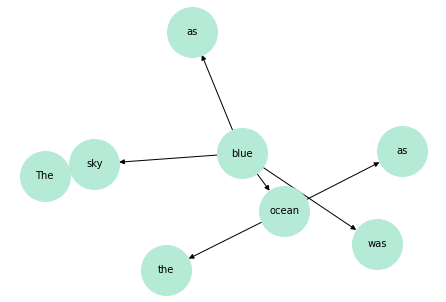

In [11]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = text.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

### Visualize using DOT Definition 

In [12]:
!pip install graphviz
from graphviz import Source
dot_def = dependency.to_dot()
print(dot_def)
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label="0 (None)"]
0 -> 5 [label="root"]
1 [label="1 (The)"]
2 [label="2 (sky)"]
2 -> 1 [label="det"]
3 [label="3 (was)"]
4 [label="4 (as)"]
5 [label="5 (blue)"]
5 -> 2 [label="nsubj"]
5 -> 3 [label="cop"]
5 -> 4 [label="advmod"]
5 -> 8 [label="obl"]
6 [label="6 (as)"]
7 [label="7 (the)"]
8 [label="8 (ocean)"]
8 -> 6 [label="case"]
8 -> 7 [label="det"]
}


'dependency_graph.png'

## Dependency parsing of sentences in a locally stored file

In [2]:
import pandas

In [12]:
df = pandas.read_csv('C:/Users/sanmeet/Documents/4th_Year/4th_Year_Sem2/BTech_Project/dataset/dataset.csv',encoding="ISO-8859-1",header=[0])
print(df)
print(df.shape[0])
print(df.loc[0][0])

                                              sentences  labels
0                     His face became as black as coal.       1
1     My uncle is as blind as a bat without his spec...       1
2                      Naina was as cool as a cucumber.       1
3                   The soldier was as brave as a lion.       1
4                             He is cunning like a fox.       1
...                                                 ...     ...
1810         They like to explore new cities and towns.       0
1811       They like to go on hiking and camping trips.       0
1812  They like to volunteer at local charities and ...       0
1813  They like to watch TV series and binge-watch s...       0
1814  They like to spend time with their families an...       0

[1815 rows x 2 columns]
1815
His face became as black as coal.


In [13]:
df.groupby(['labels']).size()

labels
0     257
1    1558
dtype: int64

In [18]:
metaphorical_count = df[df['labels']==1].shape[0]
metaphorical_count

1558

In [30]:
# Dependency parsing of first 5 sentences of dataset
for i in range(5):
#     print(df.loc[i][1])
    if df.loc[i][1] == 1:
        result = parser.raw_parse(df.loc[i][0])
        dependency = result.__next__()
        print ("-" * 75)
        print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
        print ("-" * 75)

        # Use dependency.triples() to extract the dependency triples in the form
        # ((head word, head POS), relation, (dependent word, dependent POS))  
        for dep in list(dependency.triples()):
          print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))

---------------------------------------------------------------------------
Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
became          | VBD        | nsubj      | face            | NN        
face            | NN         | nmod:poss  | His             | PRP$      
became          | VBD        | xcomp      | black           | JJ        
black           | JJ         | advmod     | as              | RB        
became          | VBD        | obl        | coal            | NN        
coal            | NN         | case       | as              | IN        
---------------------------------------------------------------------------
Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
blind           | JJ         | nsubj      | uncle           | NN        
uncle           | NN         | nm

## Writing dependency parsing data into excel file

In [5]:
import xlwt
from xlwt import Workbook

In [28]:
# Workbook is created
wb = Workbook()

# add_sheet is used to create sheet.
sheet1 = wb.add_sheet('Sheet 1', cell_overwrite_ok=True)

In [8]:
# Specifying style
style = xlwt.easyxf('font: bold 1')

In [30]:
sheet1.write(0, 0, 'Sr.No.', style)
sheet1.write(0, 1, 'Head', style)
sheet1.write(0, 2, 'Head POS', style)
sheet1.write(0, 3, 'Relation', style)
sheet1.write(0, 4, 'Dependent', style)
sheet1.write(0, 5, 'Dependent POS', style)

In [31]:
sr_no = 1
row_index = 1
# print(df.shape[0])
for i in range(df.shape[0]):
    if df.loc[i][1] == 1:
        result = parser.raw_parse(df.loc[i][0])
        dependency = result.__next__()

        # Use dependency.triples() to extract the dependency triples in the form
        # ((head word, head POS), relation, (dependent word, dependent POS))  
        for dep in list(dependency.triples()):
            sheet1.write(row_index, 0, sr_no)
            sheet1.write(row_index, 1, str(dep[0][0]))
            sheet1.write(row_index, 2, str(dep[0][1]))
            sheet1.write(row_index, 3, str(dep[1]))
            sheet1.write(row_index, 4, str(dep[2][0]))
            sheet1.write(row_index, 5, str(dep[2][1]))

            row_index += 1

        sr_no += 1

In [32]:
wb.save("dependency_parsing.xls")

## Concept-Attribute Collocations

In [7]:
# read by default 1st sheet of an excel file
dataframe1 = pandas.read_excel('dependency_parsing.xls')
 
print(dataframe1)

       Sr.No.    Head Head POS   Relation Dependent Dependent POS
0           1  became      VBD      nsubj      face            NN
1           1    face       NN  nmod:poss       His          PRP$
2           1  became      VBD      xcomp     black            JJ
3           1   black       JJ     advmod        as            RB
4           1  became      VBD        obl      coal            NN
...       ...     ...      ...        ...       ...           ...
12628    1558     nut       NN        det       The            DT
12629    1558  tasted      VBD      xcomp      rich            JJ
12630    1558    rich       JJ     advmod        as            RB
12631    1558  tasted      VBD        obl    butter            NN
12632    1558  butter       NN       case        as            IN

[12633 rows x 6 columns]


In [8]:
abc = dataframe1[dataframe1["Sr.No."] == 1]
print(abc)

   Sr.No.    Head Head POS   Relation Dependent Dependent POS
0       1  became      VBD      nsubj      face            NN
1       1    face       NN  nmod:poss       His          PRP$
2       1  became      VBD      xcomp     black            JJ
3       1   black       JJ     advmod        as            RB
4       1  became      VBD        obl      coal            NN
5       1    coal       NN       case        as            IN


In [31]:
parsing_lst = []
print(metaphorical_count)

for i in range(metaphorical_count):
    sub_df = dataframe1[dataframe1["Sr.No."] == i+1]
    sub_df = sub_df.reset_index()
    parsing_lst.append(sub_df)

print(parsing_lst)
print(len(parsing_lst))

1558
[   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0      0       1  became      VBD      nsubj      face            NN
1      1       1    face       NN  nmod:poss       His          PRP$
2      2       1  became      VBD      xcomp     black            JJ
3      3       1   black       JJ     advmod        as            RB
4      4       1  became      VBD        obl      coal            NN
5      5       1    coal       NN       case        as            IN,    index  Sr.No.        Head Head POS   Relation   Dependent Dependent POS
0      6       2       blind       JJ      nsubj       uncle            NN
1      7       2       uncle       NN  nmod:poss          My          PRP$
2      8       2       blind       JJ        cop          is           VBZ
3      9       2       blind       JJ     advmod          as            RB
4     10       2       blind       JJ        obl         bat            NN
5     11       2         bat       NN       case          as

In [42]:
# POS labels of nouns, pronouns, adjectives and verbs
nouns = ['NN', 'NNP', 'NNS', 'NNPS']
pronouns = ['PRP', 'PRP$']
adjectives = ['JJ', 'JJR', 'JJS']
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

In [51]:
verb_to_noun = []
adj_to_noun = []
verb_to_adj = []
noun_to_adj = []

noun_and_adj = []
# print(item.shape[0])

# Workbook is created
wb2 = Workbook()

# add_sheet is used to create sheet.
sheet21 = wb2.add_sheet('Sheet 1', cell_overwrite_ok=True)

sheet21.write(0, 0, 'Sr.No.', style)
sheet21.write(0, 1, 'Concept', style)
sheet21.write(0, 2, 'Attribute', style)

index = 1

def composition_of_pattern(lst1, lst2):
    result = []
    for x in lst1:
        for y in lst2:
            if x["Head"] == y["Head"] and x["Head POS"] == y["Head POS"]:
                result.append(pandas.Series({"Sr.No.":x["Sr.No."], "Dependent1":x["Dependent"], "Dependent1 POS":x["Dependent POS"], "Relation":"SBV_VOB", "Common Verb": x["Head"], "Common Verb POS": x["Head POS"], "Dependent2":y["Dependent"], "Dependent2 POS":y["Dependent POS"]}))

    for item in result:
        for x in lst1:
            if item["Common Verb"] == x["Head"] and item["Common Verb POS"] == x["Head POS"] and item["Dependent1"] == x["Dependent"] and item["Dependent1 POS"] == x["Dependent POS"]:
                if not bool(lst1):
                    lst1.remove(x)
        for y in lst2:
            if item["Common Verb"] == y["Head"] and item["Common Verb POS"] == y["Head POS"] and item["Dependent2"] == y["Dependent"] and item["Dependent2 POS"] == y["Dependent POS"]:
                if not bool(lst2):
                    lst2.remove(y)
                    
    return result

for k in range(len(parsing_lst)):
    item = parsing_lst[k]
    print(item)
    verb_to_noun.clear()
    adj_to_noun.clear()
    verb_to_adj.clear()
    noun_to_adj.clear()
    noun_and_adj.clear()
    
    for i in range(item.shape[0]):
        if item.loc[i]["Head POS"] in verbs and (item.loc[i]["Dependent POS"] in nouns or item.loc[i]["Dependent POS"] in pronouns):
            verb_to_noun.append(item.loc[i])
        if item.loc[i]["Head POS"] in adjectives and (item.loc[i]["Dependent POS"] in nouns or item.loc[i]["Dependent POS"] in pronouns):
            adj_to_noun.append(item.loc[i])
        if item.loc[i]["Head POS"] in verbs and item.loc[i]["Dependent POS"] in adjectives:
            verb_to_adj.append(item.loc[i])
        if (item.loc[i]["Head POS"] in nouns or item.loc[i]["Head POS"] in pronouns) and item.loc[i]["Dependent POS"] in adjectives:
            noun_to_adj.append(item.loc[i])

    noun_and_adj = composition_of_pattern(verb_to_noun, verb_to_adj)
    print(verb_to_noun)
    print(verb_to_adj)

    # Head: Verb, Dependent: Noun
    for m in verb_to_noun:
        sheet21.write(index, 0, k+1)
        sheet21.write(index, 1, m["Dependent"].lower())
        sheet21.write(index, 2, m["Head"].lower())
        index += 1
    
    # Head: Adjective, Dependent: Noun
    for m in adj_to_noun:
        sheet21.write(index, 0, k+1)
        sheet21.write(index, 1, m["Dependent"].lower())
        sheet21.write(index, 2, m["Head"].lower())
        index += 1
        
#     # Head: Verb, Dependent: Adjective
#     for m in verb_to_adj:
#         sheet21.write(index, 0, m["Dependent"].lower())
#         sheet21.write(index, 1, m["Head"].lower())
#         index += 1
    
    # Head: Noun, Dependent: Adjective
    for m in noun_to_adj:
        sheet21.write(index, 0, k+1)
        sheet21.write(index, 1, m["Head"].lower())
        sheet21.write(index, 2, m["Dependent"].lower())
        index += 1
        
    for m in noun_and_adj:
        sheet21.write(index, 0, k+1)
        sheet21.write(index, 1, m["Dependent1"].lower())
        sheet21.write(index, 2, m["Dependent2"].lower())
        index += 1

   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0      0       1  became      VBD      nsubj      face            NN
1      1       1    face       NN  nmod:poss       His          PRP$
2      2       1  became      VBD      xcomp     black            JJ
3      3       1   black       JJ     advmod        as            RB
4      4       1  became      VBD        obl      coal            NN
5      5       1    coal       NN       case        as            IN
[index                 0
Sr.No.                1
Head             became
Head POS            VBD
Relation          nsubj
Dependent          face
Dependent POS        NN
Name: 0, dtype: object, index                 4
Sr.No.                1
Head             became
Head POS            VBD
Relation            obl
Dependent          coal
Dependent POS        NN
Name: 4, dtype: object]
[index                 2
Sr.No.                1
Head             became
Head POS            VBD
Relation          xcomp
Dependent  

[]
[]
   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0    152      21  shined      VBD      nsubj      eyes           NNS
1    153      21    eyes      NNS  nmod:poss       Her          PRP$
2    154      21  shined      VBD      xcomp    bright            JJ
3    155      21  bright       JJ     advmod        as            RB
4    156      21  shined      VBD        obl      moon            NN
5    157      21    moon       NN       case        as            IN
6    158      21    moon       NN        det       the            DT
[index               152
Sr.No.               21
Head             shined
Head POS            VBD
Relation          nsubj
Dependent          eyes
Dependent POS       NNS
Name: 0, dtype: object, index               156
Sr.No.               21
Head             shined
Head POS            VBD
Relation            obl
Dependent          moon
Dependent POS        NN
Name: 4, dtype: object]
[index               154
Sr.No.               21
Head    

[]
[]
   index  Sr.No.       Head Head POS Relation  Dependent Dependent POS
0    346      51        run       VB    nsubj      Amber           NNP
1    347      51        run       VB      aux        can            MD
2    348      51        run       VB   advmod       fast            RB
3    349      51       fast       RB   advmod         as            RB
4    350      51        run       VB      obl  snowstorm            NN
5    351      51  snowstorm       NN     case         as            IN
6    352      51  snowstorm       NN      det          a            DT
[index              346
Sr.No.              51
Head               run
Head POS            VB
Relation         nsubj
Dependent        Amber
Dependent POS      NNP
Name: 0, dtype: object, index                  350
Sr.No.                  51
Head                   run
Head POS                VB
Relation               obl
Dependent        snowstorm
Dependent POS           NN
Name: 4, dtype: object]
[]
   index  Sr.No.      He

Name: 2, dtype: object]
[]
   index  Sr.No.     Head Head POS Relation Dependent Dependent POS
0    522      78    proud       JJ    nsubj     Kitty           NNP
1    523      78    proud       JJ      cop        is           VBZ
2    524      78    proud       JJ   advmod        as            RB
3    525      78    proud       JJ      obl   peacock            NN
4    526      78  peacock       NN     case        as            IN
5    527      78  peacock       NN      det         a            DT
[]
[]
   index  Sr.No.   Head Head POS Relation Dependent Dependent POS
0    528      79  works      VBZ    nsubj    Sruthy           NNP
1    529      79  works      VBZ      obl     sloth            NN
2    530      79  sloth       NN     case      like            IN
3    531      79  sloth       NN      det         a            DT
[index               528
Sr.No.               79
Head              works
Head POS            VBZ
Relation          nsubj
Dependent        Sruthy
Dependent POS   

Name: 3, dtype: object]
[]
   index  Sr.No.   Head Head POS   Relation Dependent Dependent POS
0    793     116  sharp       JJ      nsubj     focus            NN
1    794     116  focus       NN  nmod:poss       Her          PRP$
2    795     116  sharp       JJ        cop       was           VBD
3    796     116  sharp       JJ     advmod        as            RB
4    797     116  sharp       JJ        obl     laser            NN
5    798     116  laser       NN       case        as            IN
[]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0    799     117     stood      VBD    nsubj    temple            NN
1    800     117    temple       NN      det       The            DT
2    801     117     stood      VBD    xcomp      tall            JJ
3    802     117      tall       JJ   advmod        as            RB
4    803     117     stood      VBD      obl  mountain            NN
5    804     117  mountain       NN     case        as            IN
6    805

Name: 3, dtype: object]
[]
   index  Sr.No.     Head Head POS   Relation Dependent Dependent POS
0   1225     172  radiant       JJ      nsubj    beauty            NN
1   1226     172   beauty       NN  nmod:poss     queen            NN
2   1227     172    queen       NN        det       The            DT
3   1228     172    queen       NN       case        's           POS
4   1229     172  radiant       JJ        cop       was           VBD
5   1230     172  radiant       JJ     advmod        as            RB
6   1231     172  radiant       JJ        obl       sun            NN
7   1232     172      sun       NN       case        as            IN
8   1233     172      sun       NN        det       the            DT
[]
[]
   index  Sr.No.     Head Head POS Relation Dependent Dependent POS
0   1234     173    thick       JJ    nsubj   silence            NN
1   1235     173  silence       NN      det       The            DT
2   1236     173  silence       NN     nmod   library          

[]
[]
   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0   1711     240  smooth       JJ      nsubj      face            NN
1   1712     240    face       NN  nmod:poss      girl            NN
2   1713     240    girl       NN        det       The            DT
3   1714     240    girl       NN       case        's           POS
4   1715     240  smooth       JJ        cop       was           VBD
5   1716     240  smooth       JJ     advmod        as            RB
6   1717     240  smooth       JJ        obl      silk            NN
7   1718     240    silk       NN       case        as            IN
[]
[]
   index  Sr.No.  Head Head POS      Relation  Dependent Dependent POS
0   1719     241   lit      VBD         nsubj       face            NN
1   1720     241  face       NN     nmod:poss        Her          PRP$
2   1721     241   lit      VBD  compound:prt         up            RP
3   1722     241   lit      VBD           obl       tree            NN
4   1723    

   index  Sr.No.   Head Head POS Relation Dependent Dependent POS
0   2082     290  tough       JJ    nsubj        He           PRP
1   2083     290  tough       JJ      cop        is           VBZ
2   2084     290  tough       JJ   advmod        as            RB
3   2085     290  tough       JJ      obl     nails           NNS
4   2086     290  nails      NNS     case        as            IN
[]
[]
   index  Sr.No.       Head Head POS Relation Dependent Dependent POS
0   2087     291  difficult       JJ    nsubj      exam            NN
1   2088     291       exam       NN      det       The            DT
2   2089     291  difficult       JJ      cop       was           VBD
3   2090     291  difficult       JJ   advmod        as            RB
4   2091     291  difficult       JJ    advcl  climbing           VBG
5   2092     291   climbing      VBG     mark        as            IN
6   2093     291   climbing      VBG      obj  mountain            NN
7   2094     291   mountain       NN  

[]
[]
   index  Sr.No.   Head Head POS Relation Dependent Dependent POS
0   2259     316  smart       JJ    nsubj        He           PRP
1   2260     316  smart       JJ      cop        is           VBZ
2   2261     316  smart       JJ   advmod        as            RB
3   2262     316  smart       JJ      obl       fox            NN
4   2263     316    fox       NN     case        as            IN
5   2264     316    fox       NN      det         a            DT
[]
[]
   index  Sr.No.  Head Head POS Relation Dependent Dependent POS
0   2265     317   hot       JJ    nsubj      soup            NN
1   2266     317  soup       NN      det       The            DT
2   2267     317   hot       JJ      cop        is           VBZ
3   2268     317   hot       JJ   advmod        as            RB
4   2269     317   hot       JJ      obl      lava            NN
5   2270     317  lava       NN     case        as            IN
[]
[]
   index  Sr.No.         Head Head POS Relation Dependent Depende

[]
[]
   index  Sr.No.        Head Head POS Relation Dependent Dependent POS
0   2486     352  determined       JJ    nsubj       She           PRP
1   2487     352  determined       JJ      cop        is           VBZ
2   2488     352  determined       JJ   advmod        as            RB
3   2489     352  determined       JJ      obl   bulldog            NN
4   2490     352     bulldog       NN     case        as            IN
5   2491     352     bulldog       NN      det         a            DT
[]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   2492     353      cool       JJ    nsubj        He           PRP
1   2493     353      cool       JJ      cop        is           VBZ
2   2494     353      cool       JJ   advmod        as            RB
3   2495     353      cool       JJ      obl  cucumber            NN
4   2496     353  cucumber       NN     case        as            IN
5   2497     353  cucumber       NN      det         a            DT
[]
[]
  

8   2962     424    barrel       NN      det         a            DT
[index                2959
Sr.No.                424
Head             shooting
Head POS              VBG
Relation              obj
Dependent            fish
Dependent POS          NN
Name: 5, dtype: object, index                2960
Sr.No.                424
Head             shooting
Head POS              VBG
Relation              obl
Dependent          barrel
Dependent POS          NN
Name: 6, dtype: object]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   2963     425     solid       JJ    nsubj  contract            NN
1   2964     425  contract       NN      det      This            DT
2   2965     425     solid       JJ      cop        is           VBZ
3   2966     425     solid       JJ   advmod        as            RB
4   2967     425     solid       JJ      obl    ground            NN
5   2968     425    ground       NN     case        as            IN
6   2969     425    ground      

Name: 7, dtype: object]
[]
    index  Sr.No.    Head Head POS Relation Dependent Dependent POS
0    3165     451  inched      VBD    nsubj     forms           NNS
1    3166     451   forms      NNS      det       The            DT
2    3167     451   forms      NNS   nummod   stooped            CD
3    3168     451  inched      VBD      obl      line            NN
4    3169     451    line       NN     case        in            IN
5    3170     451    line       NN      det        an            DT
6    3171     451    line       NN     amod    uneven            JJ
7    3172     451  inched      VBD      obl      wave            NN
8    3173     451    wave       NN     case      like            IN
9    3174     451    wave       NN      det         a            DT
10   3175     451  inched      VBD      obl     field            NN
11   3176     451   field       NN     case    across            IN
12   3177     451   field       NN      det       the            DT
13   3178     451   f

[index               3510
Sr.No.               491
Head             Arguing
Head POS             VBG
Relation             obl
Dependent            her
Dependent POS        PRP
Name: 1, dtype: object, index                3514
Sr.No.                491
Head              dueling
Head POS              VBG
Relation             nmod
Dependent        grenades
Dependent POS         NNS
Name: 5, dtype: object]
[]
    index  Sr.No.       Head Head POS Relation  Dependent Dependent POS
0    3517     492      quiet       JJ    nsubj  classroom            NN
1    3518     492  classroom       NN      det        The            DT
2    3519     492      quiet       JJ      cop        was           VBD
3    3520     492      quiet       JJ   advmod         as            RB
4    3521     492      quiet       JJ      obl  librarian            NN
5    3522     492  librarian       NN     case         as            IN
6    3523     492  librarian       NN      det          a            DT
7    3524     4

[]
[]
    index  Sr.No.      Head Head POS Relation   Dependent Dependent POS
0    3954     544   flowing      VBG    nsubj    Thoughts           NNS
1    3955     544  Thoughts      NNS     nmod        mind            NN
2    3956     544      mind       NN     case          in            IN
3    3957     544      mind       NN      det         the            DT
4    3958     544   flowing      VBG      aux         are           VBP
5    3959     544   flowing      VBG   advmod  constantly            RB
6    3960     544   flowing      VBG      obl       waves           NNS
7    3961     544     waves      NNS     case        like            IN
8    3962     544     waves      NNS     nmod       ocean            NN
9    3963     544     ocean       NN     case          in            IN
10   3964     544     ocean       NN      det         the            DT
[index                3954
Sr.No.                544
Head              flowing
Head POS              VBG
Relation            nsubj

[index             4301
Sr.No.             583
Head               lay
Head POS           VBP
Relation         nsubj
Dependent        world
Dependent POS       NN
Name: 0, dtype: object, index                 4305
Sr.No.                 583
Head             stretched
Head POS               VBN
Relation               obl
Dependent              him
Dependent POS          PRP
Name: 4, dtype: object, index                 4307
Sr.No.                 583
Head             stretched
Head POS               VBN
Relation               obl
Dependent             palm
Dependent POS           NN
Name: 6, dtype: object]
[]
   index  Sr.No.         Head Head POS Relation Dependent Dependent POS
0   4314     584  unconscious       JJ    nsubj   Patient           NNP
1   4315     584  unconscious       JJ      cop        is           VBZ
2   4316     584  unconscious       JJ   advmod        as            RB
3   4317     584  unconscious       JJ      obl    flower            NN
4   4318     584       fl

[]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   4697     631  breathed      VBD    nsubj        He           PRP
1   4698     631  breathed      VBD   advmod    calmly            RB
2   4699     631    calmly       RB   advmod        as            RB
3   4700     631  breathed      VBD      obl       sea            NN
4   4701     631       sea       NN     case        as            IN
5   4702     631       sea       NN      det         a            DT
6   4703     631       sea       NN     nmod      rest            NN
7   4704     631      rest       NN     case        at            IN
[index                4697
Sr.No.                631
Head             breathed
Head POS              VBD
Relation            nsubj
Dependent              He
Dependent POS         PRP
Name: 0, dtype: object, index                4700
Sr.No.                631
Head             breathed
Head POS              VBD
Relation              obl
Dependent             sea
Dependent 

[]
   index  Sr.No.     Head Head POS   Relation Dependent Dependent POS
0   6555     867  vibrant       JJ      nsubj     voice            NN
1   6556     867    voice       NN  nmod:poss       Her          PRP$
2   6557     867  vibrant       JJ        cop       was           VBD
3   6558     867  vibrant       JJ        obl     notes           NNS
4   6559     867    notes      NNS       case      like            IN
5   6560     867    notes      NNS        det       the            DT
6   6561     867    notes      NNS       amod    middle            JJ
7   6562     867    notes      NNS       nmod     cello            NN
8   6563     867    cello       NN       case        of            IN
9   6564     867    cello       NN        det         a            DT
[]
[]
   index  Sr.No.      Head Head POS   Relation Dependent Dependent POS
0   6565     868   sounded      VBD      nsubj     words           NNS
1   6566     868     words      NNS  nmod:poss       Her          PRP$
2   6567

[]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   6740     893  reliable       JJ    nsubj   battery            NN
1   6741     893   battery       NN      det       The            DT
2   6742     893  reliable       JJ      cop       was           VBD
3   6743     893  reliable       JJ   advmod        as            RB
4   6744     893  reliable       JJ      obl       sun            NN
5   6745     893       sun       NN     case        as            IN
6   6746     893       sun       NN      det       the            DT
7   6747     893       sun       NN     amod    rising           VBG
[]
[]
   index  Sr.No.     Head Head POS   Relation Dependent Dependent POS
0   6748     894     sank      VBD      nsubj   spirits           NNS
1   6749     894  spirits      NNS  nmod:poss       His          PRP$
2   6750     894     sank      VBD        obl     stone            NN
3   6751     894    stone       NN       case      like            IN
4   6752     894 

Name: 5, dtype: object]
[]
    index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0    6888     912    soft       JJ      nsubj      sand            NN
1    6889     912    sand       NN        det       The            DT
2    6890     912    soft       JJ        cop       was           VBD
3    6891     912    soft       JJ     advmod        as            RB
4    6892     912    soft       JJ        obl    carpet            NN
5    6893     912  carpet       NN       case        as            IN
6    6894     912  carpet       NN        det         a            DT
7    6895     912  carpet       NN       amod     plush            JJ
8    6896     912    soft       JJ        obl      feet           NNS
9    6897     912    feet      NNS       case   beneath            IN
10   6898     912    feet      NNS  nmod:poss       our          PRP$
[]
[]
   index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   6899     913  marching      VBG    nsubj       Men    

[index                  7330
Sr.No.                  968
Head                   knit
Head POS                VBN
Relation         nsubj:pass
Dependent            circle
Dependent POS            NN
Name: 0, dtype: object, index              7338
Sr.No.              968
Head               knit
Head POS            VBN
Relation            obl
Dependent        family
Dependent POS        NN
Name: 8, dtype: object]
[]
   index  Sr.No.      Head Head POS  Relation Dependent Dependent POS
0   7341     969  unbroken       JJ     nsubj    circle            NN
1   7342     969    circle       NN       det       The            DT
2   7343     969  unbroken       JJ       cop       was           VBD
3   7344     969  unbroken       JJ    advmod        as            RB
4   7345     969  unbroken       JJ       obl      band            NN
5   7346     969      band       NN      case        as            IN
6   7347     969      band       NN       det         a            DT
7   7348     969      ba

[]
[]
   index  Sr.No.       Head Head POS   Relation  Dependent Dependent POS
0   7700    1011   delicate       JJ      nsubj     petals           NNS
1   7701    1011     petals      NNS  nmod:poss  sunflower            NN
2   7702    1011  sunflower       NN        det        The            DT
3   7703    1011  sunflower       NN       case         's           POS
4   7704    1011   delicate       JJ        cop       were           VBD
5   7705    1011   delicate       JJ     advmod         as            RB
6   7706    1011   delicate       JJ        obl      wings           NNS
7   7707    1011      wings      NNS       case         as            IN
8   7708    1011      wings      NNS   compound  butterfly            NN
[]
[]
   index  Sr.No.        Head Head POS Relation   Dependent Dependent POS
0   7709    1012         big       JJ    nsubj   jackfruit            NN
1   7710    1012   jackfruit       NN      det         The            DT
2   7711    1012         big       JJ  

[]
[]
   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0   7895    1035  licked      VBD      nsubj       She           PRP
1   7896    1035  licked      VBD        obj      lips           NNS
2   7897    1035    lips      NNS  nmod:poss       her          PRP$
3   7898    1035  licked      VBD        obl       cat            NN
4   7899    1035     cat       NN       case      like            IN
5   7900    1035     cat       NN        det         a            DT
6   7901    1035     cat       NN       amod    hungry            JJ
[index              7895
Sr.No.             1035
Head             licked
Head POS            VBD
Relation          nsubj
Dependent           She
Dependent POS       PRP
Name: 0, dtype: object, index              7896
Sr.No.             1035
Head             licked
Head POS            VBD
Relation            obj
Dependent          lips
Dependent POS       NNS
Name: 1, dtype: object, index              7898
Sr.No.             1035
Head     

[]
[]
    index  Sr.No.      Head Head POS  Relation Dependent Dependent POS
0    8367    1086      high       JJ     nsubj     price            NN
1    8368    1086     price       NN       det       The            DT
2    8369    1086     price       NN      nmod       car            NN
3    8370    1086       car       NN      case        of            IN
4    8371    1086       car       NN       det      that            DT
5    8372    1086       car       NN  compound    luxury            NN
6    8373    1086      high       JJ       cop       was           VBD
7    8374    1086      high       JJ    advmod        as            RB
8    8375    1086      high       JJ       obl      peak            NN
9    8376    1086      peak       NN      case        as            IN
10   8377    1086      peak       NN       det       the            DT
11   8378    1086      peak       NN      nmod  mountain            NN
12   8379    1086  mountain       NN      case        of            IN


[index                8898
Sr.No.               1137
Head               leaves
Head POS              VBZ
Relation            nsubj
Dependent        rustling
Dependent POS          NN
Name: 0, dtype: object, index              8900
Sr.No.             1137
Head             leaves
Head POS            VBZ
Relation            obl
Dependent          bush
Dependent POS        NN
Name: 2, dtype: object, index               8904
Sr.No.              1137
Head             sounded
Head POS             VBN
Relation             obl
Dependent         chorus
Dependent POS         NN
Name: 6, dtype: object]
[]
    index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0    8909    1138   prickly       JJ    nsubj  branches           NNS
1    8910    1138  branches      NNS      det       The            DT
2    8911    1138  branches      NNS     amod    thorny            JJ
3    8912    1138  branches      NNS     nmod      bush            NN
4    8913    1138      bush       NN     case    

[index                  9332
Sr.No.                 1183
Head             stretching
Head POS                VBG
Relation                obl
Dependent            ground
Dependent POS            NN
Name: 3, dtype: object]
[]
    index  Sr.No.       Head Head POS Relation  Dependent Dependent POS
0    9345    1184  beautiful       JJ    nsubj     colors           NNS
1    9346    1184     colors      NNS      det        The            DT
2    9347    1184     colors      NNS     nmod        sky            NN
3    9348    1184        sky       NN     case         of            IN
4    9349    1184        sky       NN      det        the            DT
5    9350    1184        sky       NN     nmod  afternoon            NN
6    9351    1184  afternoon       NN     case         in            IN
7    9352    1184  afternoon       NN      det        the            DT
8    9353    1184  afternoon       NN     amod       late            JJ
9    9354    1184  beautiful       JJ      cop       wer

[index               9527
Sr.No.              1202
Head             floated
Head POS             VBD
Relation           nsubj
Dependent            She
Dependent POS        PRP
Name: 0, dtype: object, index               9528
Sr.No.              1202
Head             floated
Head POS             VBD
Relation             obl
Dependent          light
Dependent POS         NN
Name: 1, dtype: object, index               9531
Sr.No.              1202
Head             floated
Head POS             VBD
Relation             obl
Dependent           moth
Dependent POS         NN
Name: 4, dtype: object, index             9535
Sr.No.            1202
Head             drawn
Head POS           VBN
Relation           obl
Dependent        flame
Dependent POS       NN
Name: 8, dtype: object]
[]
   index  Sr.No.      Head Head POS   Relation Dependent Dependent POS
0   9538    1203  twitched      VBD      nsubj  antennae            NN
1   9539    1203  antennae       NN  nmod:poss       His          PRP$
2

[]
   index  Sr.No.     Head Head POS Relation Dependent Dependent POS
0   9675    1218    burst      VBD    nsubj   billows           NNS
1   9676    1218  billows      NNS      det       The            DT
2   9677    1218    burst      VBD      obl    cannon            NN
3   9678    1218   cannon       NN     case      like            IN
4   9679    1218    burst      VBD      obl     coast            NN
5   9680    1218    coast       NN     case      down            IN
6   9681    1218    coast       NN      det       the            DT
[index               9675
Sr.No.              1218
Head               burst
Head POS             VBD
Relation           nsubj
Dependent        billows
Dependent POS        NNS
Name: 0, dtype: object, index              9677
Sr.No.             1218
Head              burst
Head POS            VBD
Relation            obl
Dependent        cannon
Dependent POS        NN
Name: 2, dtype: object, index             9679
Sr.No.            1218
Head           

Name: 7, dtype: object]
[]
   index  Sr.No.     Head Head POS Relation Dependent Dependent POS
0   9875    1241  stunned      VBD    nsubj       day            NN
1   9876    1241      day       NN      det       The            DT
2   9877    1241  stunned      VBD      obj        me           PRP
3   9878    1241  stunned      VBD      obl     light            NN
4   9879    1241    light       NN     case      like            IN
[index               9875
Sr.No.              1241
Head             stunned
Head POS             VBD
Relation           nsubj
Dependent            day
Dependent POS         NN
Name: 0, dtype: object, index               9877
Sr.No.              1241
Head             stunned
Head POS             VBD
Relation             obj
Dependent             me
Dependent POS        PRP
Name: 2, dtype: object, index               9878
Sr.No.              1241
Head             stunned
Head POS             VBD
Relation             obl
Dependent          light
Dependent POS   

[index             10179
Sr.No.             1274
Head              spout
Head POS            VBP
Relation          nsubj
Dependent        faucet
Dependent POS        NN
Name: 0, dtype: object, index             10187
Sr.No.             1274
Head             flowed
Head POS            VBD
Relation          nsubj
Dependent         water
Dependent POS        NN
Name: 8, dtype: object]
[index              10181
Sr.No.              1274
Head               spout
Head POS             VBP
Relation           xcomp
Dependent        twisted
Dependent POS         JJ
Name: 2, dtype: object]
   index  Sr.No.    Head Head POS Relation Dependent Dependent POS
0  10190    1275  sticky       JJ    nsubj      tape            NN
1  10191    1275    tape       NN      det       The            DT
2  10192    1275  sticky       JJ      cop       was           VBD
3  10193    1275  sticky       JJ   advmod        as            RB
4  10194    1275  sticky       JJ      obl     honey            NN
5  10195    1

7  10444    1305  woman       NN       case        's           POS
[index            10437
Sr.No.            1305
Head             waved
Head POS           VBD
Relation         nsubj
Dependent        trees
Dependent POS      NNS
Name: 0, dtype: object, index            10440
Sr.No.            1305
Head             waved
Head POS           VBD
Relation           obl
Dependent         hair
Dependent POS       NN
Name: 3, dtype: object]
[]
   index  Sr.No.     Head Head POS  Relation Dependent Dependent POS
0  10445    1306   sturdy       JJ     nsubj   mailbox            NN
1  10446    1306  mailbox       NN       det       The            DT
2  10447    1306   sturdy       JJ       cop       was           VBD
3  10448    1306   sturdy       JJ    advmod        as            RB
4  10449    1306   sturdy       JJ       obl      wall            NN
5  10450    1306     wall       NN      case        as            IN
6  10451    1306     wall       NN       det         a            DT
7  104

Name: 8, dtype: object]
[]
    index  Sr.No.    Head Head POS   Relation  Dependent Dependent POS
0   11435    1424  narrow       JJ      nsubj      waist            NN
1   11436    1424   waist       NN  nmod:poss        His          PRP$
2   11437    1424  narrow       JJ        cop        was           VBD
3   11438    1424  narrow       JJ     advmod         as            RB
4   11439    1424  narrow       JJ        obl       pole            NN
5   11440    1424    pole       NN       case         as            IN
6   11441    1424    pole       NN  nmod:poss     walker            NN
7   11442    1424  walker       NN        det          a            DT
8   11443    1424  walker       NN       amod  tightrope            JJ
9   11444    1424  walker       NN       case         's           POS
10  11445    1424    pole       NN       amod  balancing           VBG
[]
[]
    index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0   11446    1425  hugged      VBD      nsubj

[]
[]
   index  Sr.No.    Head Head POS   Relation Dependent Dependent POS
0  11808    1464     fit      VBP      nsubj      band            NN
1  11809    1464    band       NN        det       The            DT
2  11810    1464    band       NN   compound   wedding            NN
3  11811    1464     fit      VBP        obj    finger            NN
4  11812    1464  finger       NN  nmod:poss       his          PRP$
5  11813    1464     fit      VBP        obl     glove            NN
6  11814    1464   glove       NN       case      like            IN
7  11815    1464   glove       NN        det         a            DT
[index            11808
Sr.No.            1464
Head               fit
Head POS           VBP
Relation         nsubj
Dependent         band
Dependent POS       NN
Name: 0, dtype: object, index             11811
Sr.No.             1464
Head                fit
Head POS            VBP
Relation            obj
Dependent        finger
Dependent POS        NN
Name: 3, dtype: obj

[]
    index  Sr.No.      Head Head POS Relation Dependent Dependent POS
0   12385    1531     tangy       JJ    nsubj     taste            NN
1   12386    1531     taste       NN      det       The            DT
2   12387    1531     taste       NN     nmod    pickle            NN
3   12388    1531    pickle       NN     case        of            IN
4   12389    1531    pickle       NN      det       the            DT
5   12390    1531     tangy       JJ      cop       was           VBD
6   12391    1531     tangy       JJ   advmod        as            RB
7   12392    1531     tangy       JJ      obl    orange            NN
8   12393    1531    orange       NN     case        as            IN
9   12394    1531    orange       NN      det         a            DT
10  12395    1531    orange       NN     amod  squeezed            JJ
11  12396    1531  squeezed       JJ   advmod   freshly            RB
[]
[]
    index  Sr.No.     Head Head POS  Relation Dependent Dependent POS
0   12397  

In [52]:
wb2.save("concept_attribute_collocations.xls")

## Writing Concepts and Attributes

In [3]:
df_kg = pandas.read_excel('knowledge_graph_triples_complete.xls')
print(df_kg)

        Target       Attribute                    Source  labels
0         face           black                      coal       1
1        uncle           blind                       bat       1
2        naina            cool                  cucumber       1
3      soldier           brave                      lion       1
4           he         cunning                       fox       1
...        ...             ...                       ...     ...
1810  Computer         Stylish              Sleek Design       0
1811     Chair         Stylish      Decorative Stitching       0
1812     Movie        Animated             Cartoon Style       0
1813    Person            Kind       Empathetic Attitude       0
1814   Vehicle  Fuel-efficient  Hybrid Engine Technology       0

[1815 rows x 4 columns]


In [6]:
# Workbook is created
wb3 = Workbook()

# add_sheet is used to create sheet.
sheet3 = wb3.add_sheet('Sheet 1', cell_overwrite_ok=True)

In [21]:
sheet3.write(0, 0, 'Concept', style)
sheet3.write(0, 1, 'Attribute', style)
sheet3.write(0, 2, 'labels', style)

In [22]:
index = 1
for i in range(df_kg.shape[0]):
    concept = df_kg['Target'][i]
    attribute = df_kg['Attribute'][i]
    label = int(df_kg['labels'][i])
    
#     print(concept, attribute)
    sheet3.write(index, 0, concept)
    sheet3.write(index, 1, attribute)
    sheet3.write(index, 2, label)
    index += 1

In [23]:
wb3.save("concept_attribute_col.xls")